In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
region_df = pd.read_parquet("/home2/s5549329/windAI_rug/WindAi/deep_learning/created_datasets/NO1.parquet")


In [17]:
region_df.head()

,time,ws10m_mean,ws10m_std,wd10m_mean,wd10m_std,t2m_mean,t2m_std,rh2m_mean,rh2m_std,mslp_mean,mslp_std,g10m_mean,g10m_std,t2m_now,mslp_now,rh2m_now,precip_now,ws10m_now,wd10m_now,power_MW
0,2020-02-15 13:00:00,3.358135,0.378822,218.735674,5.881298,276.304744,0.411686,0.842491,0.051295,100579.730611,31.462750,8.381703,0.991343,276.314178,100598.023438,0.852978,0.000617,3.711130,217.242462,44.666173
1,2020-02-15 14:00:00,3.122371,0.452259,206.372581,6.159813,275.975155,0.384912,0.867678,0.055230,100564.250167,44.371400,8.208556,0.789677,275.946930,100593.203125,0.884543,0.000181,3.483180,207.492828,65.059451
2,2020-02-15 15:00:00,2.897094,0.368524,191.985830,6.705309,275.442468,0.356906,0.911628,0.054637,100517.015378,55.889691,7.577428,0.771540,275.529144,100512.468750,0.918824,0.000038,2.808272,196.660538,86.562093
3,2020-02-15 16:00:00,3.035758,0.494459,183.045830,6.086777,274.831068,0.454263,0.958786,0.038495,100458.559889,63.529883,7.640261,0.916110,274.937225,100429.398438,0.980287,0.004540,2.647012,183.282181,77.712180
4,2020-02-15 17:00:00,3.431322,0.471104,173.643215,8.975834,274.699112,0.596259,0.979199,0.023339,100348.114356,70.967887,8.197493,0.972411,274.975281,100349.312500,0.992305,0.000152,3.103675,173.968979,96.571011


In [18]:
region_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ws10m_mean,44535.0,2.585237,1.228684,4.902011e-01,1.667938,2.344294,3.252934,9.586797
ws10m_std,44535.0,0.544562,0.210001,1.009426e-01,0.391442,0.506542,0.656950,2.151820
wd10m_mean,44535.0,184.132853,73.553011,1.068983e+01,129.909363,190.923354,230.741018,349.024770
wd10m_std,44535.0,35.302344,32.268250,1.977233e+00,10.935712,21.703867,52.288990,167.208495
t2m_mean,44535.0,277.882320,8.350162,2.535901e+02,271.796921,277.098682,284.550748,301.270083
t2m_std,44535.0,0.787328,0.349659,1.933629e-01,0.544399,0.715799,0.947601,3.749734
rh2m_mean,44535.0,0.801051,0.171286,1.966908e-01,0.698330,0.845578,0.945244,1.000007
rh2m_std,44535.0,0.046593,0.028867,4.708625e-07,0.025510,0.042501,0.062348,0.233951
mslp_mean,44535.0,101209.339766,1207.510878,9.637695e+04,100483.320065,101262.288506,102032.724344,104932.468383
mslp_std,44535.0,97.038617,46.580947,2.132412e+01,64.294367,85.730472,116.731764,459.134544


In [19]:
region_df.isnull().sum()

time          0
ws10m_mean    0
ws10m_std     0
wd10m_mean    0
wd10m_std     0
t2m_mean      0
t2m_std       0
rh2m_mean     0
rh2m_std      0
mslp_mean     0
mslp_std      0
g10m_mean     0
g10m_std      0
t2m_now       0
mslp_now      0
rh2m_now      0
precip_now    0
ws10m_now     0
wd10m_now     0
power_MW      2
dtype: int64

In [20]:
region_df.shape

(44535, 20)

In [21]:
region_df = region_df.dropna(subset=['power_MW'])

In [22]:
region_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ws10m_mean,44533.0,2.585212,1.228685,4.902011e-01,1.667921,2.344294,3.252913,9.586797
ws10m_std,44533.0,0.544562,0.210005,1.009426e-01,0.391438,0.506507,0.656968,2.151820
wd10m_mean,44533.0,184.134809,73.552006,1.068983e+01,129.909841,190.923354,230.746220,349.024770
wd10m_std,44533.0,35.303453,32.268524,1.977233e+00,10.935780,21.704023,52.290885,167.208495
t2m_mean,44533.0,277.882639,8.350201,2.535901e+02,271.796996,277.098790,284.551153,301.270083
t2m_std,44533.0,0.787335,0.349665,1.933629e-01,0.544407,0.715799,0.947602,3.749734
rh2m_mean,44533.0,0.801052,0.171290,1.966908e-01,0.698318,0.845578,0.945251,1.000007
rh2m_std,44533.0,0.046594,0.028868,4.708625e-07,0.025509,0.042501,0.062349,0.233951
mslp_mean,44533.0,101209.351163,1207.531911,9.637695e+04,100483.361774,101262.288506,102032.727159,104932.468383
mslp_std,44533.0,97.036732,46.580686,2.132412e+01,64.294249,85.730024,116.730335,459.134544


In [23]:
time_df = pd.to_datetime(region_df.pop("time"), format='%d.%m.%Y %H:%M:%S')

In [24]:
scaler = StandardScaler()
features = region_df.drop(columns=["power_MW"])
features = features.select_dtypes(include=["number"])
features_scaled = scaler.fit_transform(features)

target = region_df["power_MW"].values
features_scaled.shape

(44533, 18)

In [25]:
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=region_df.index)

region_sample_scaled = pd.concat([features_scaled_df, region_df["power_MW"]], axis=1)
region_sample_scaled.head(6)

,ws10m_mean,ws10m_std,wd10m_mean,wd10m_std,t2m_mean,t2m_std,rh2m_mean,rh2m_std,mslp_mean,mslp_std,g10m_mean,g10m_std,t2m_now,mslp_now,rh2m_now,precip_now,ws10m_now,wd10m_now,power_MW
0,0.629072,-0.789226,0.470432,-0.911801,-0.188967,-1.074322,0.241926,0.162876,-0.521417,-1.407766,0.575403,-0.341563,-0.169426,-0.502872,0.270300,-0.319726,0.865499,0.421627,44.666173
1,0.437187,-0.439534,0.302344,-0.903170,-0.228438,-1.150896,0.388972,0.299175,-0.534237,-1.130639,0.517469,-0.754652,-0.211967,-0.506873,0.457701,-0.321240,0.688705,0.296229,65.059451
2,0.253837,-0.838267,0.106742,-0.886265,-0.292232,-1.230990,0.645557,0.278633,-0.573354,-0.883360,0.306296,-0.791803,-0.260363,-0.573893,0.661225,-0.321735,0.165259,0.156906,86.562093
3,0.366694,-0.238581,-0.014806,-0.905434,-0.365453,-0.952555,0.920875,-0.280541,-0.621764,-0.719337,0.327319,-0.495669,-0.328930,-0.642853,1.026125,-0.306112,0.040189,-0.015164,77.712180
4,0.688639,-0.349794,-0.142643,-0.815901,-0.381256,-0.546460,1.040051,-0.805551,-0.713229,-0.559655,0.513767,-0.380344,-0.324522,-0.709335,1.097479,-0.321342,0.394368,-0.134949,96.571011
5,1.037667,-0.304903,-0.242159,-0.843253,-0.361774,-0.448154,1.080546,-1.001310,-0.822596,-0.321609,0.863824,-0.204332,-0.306797,-0.810255,1.126044,-0.319010,0.829375,-0.265216,133.625789


In [26]:
timestamp_s = time_df.map(pd.Timestamp.timestamp)
timestamp_s.head()

0    1.581772e+09
1    1.581775e+09
2    1.581779e+09
3    1.581782e+09
4    1.581786e+09
Name: time, dtype: float64

In [27]:
day = 24*60*60
year = (365.2425)*day

region_sample_scaled['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
region_sample_scaled['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
region_sample_scaled['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
region_sample_scaled['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
region_sample_scaled.head(6)

,ws10m_mean,ws10m_std,wd10m_mean,wd10m_std,t2m_mean,t2m_std,rh2m_mean,rh2m_std,mslp_mean,mslp_std,...,mslp_now,rh2m_now,precip_now,ws10m_now,wd10m_now,power_MW,Day sin,Day cos,Year sin,Year cos
0,0.629072,-0.789226,0.470432,-0.911801,-0.188967,-1.074322,0.241926,0.162876,-0.521417,-1.407766,...,-0.502872,0.270300,-0.319726,0.865499,0.421627,44.666173,-0.258819,-9.659258e-01,0.704198,0.710004
1,0.437187,-0.439534,0.302344,-0.903170,-0.228438,-1.150896,0.388972,0.299175,-0.534237,-1.130639,...,-0.506873,0.457701,-0.321240,0.688705,0.296229,65.059451,-0.500000,-8.660254e-01,0.704707,0.709499
2,0.253837,-0.838267,0.106742,-0.886265,-0.292232,-1.230990,0.645557,0.278633,-0.573354,-0.883360,...,-0.573893,0.661225,-0.321735,0.165259,0.156906,86.562093,-0.707107,-7.071068e-01,0.705215,0.708994
3,0.366694,-0.238581,-0.014806,-0.905434,-0.365453,-0.952555,0.920875,-0.280541,-0.621764,-0.719337,...,-0.642853,1.026125,-0.306112,0.040189,-0.015164,77.712180,-0.866025,-5.000000e-01,0.705723,0.708488
4,0.688639,-0.349794,-0.142643,-0.815901,-0.381256,-0.546460,1.040051,-0.805551,-0.713229,-0.559655,...,-0.709335,1.097479,-0.321342,0.394368,-0.134949,96.571011,-0.965926,-2.588190e-01,0.706231,0.707982
5,1.037667,-0.304903,-0.242159,-0.843253,-0.361774,-0.448154,1.080546,-1.001310,-0.822596,-0.321609,...,-0.810255,1.126044,-0.319010,0.829375,-0.265216,133.625789,-1.000000,-1.110103e-11,0.706738,0.707475


In [28]:
print(f"Total numeric features in dataset: {region_sample_scaled.select_dtypes(include=np.number).shape[1]}")

Total numeric features in dataset: 23


In [29]:
corr = region_sample_scaled.corr()
top_corr = corr["power_MW"].abs().sort_values(ascending=False).head(32)  # includes power_MW
top_features = top_corr.index.tolist()

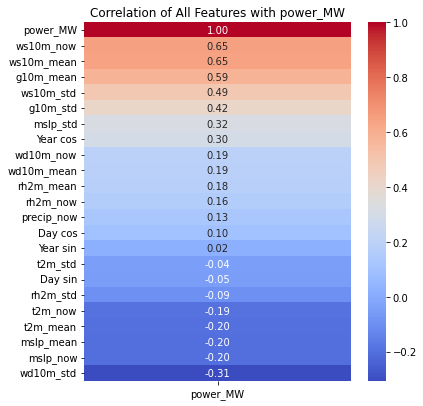

In [31]:
plt.figure(figsize=(6, len(region_sample_scaled.columns) * 0.25))  # auto-size by number of features
sns.heatmap(region_sample_scaled.corr()[["power_MW"]].sort_values(by="power_MW", ascending=False),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of All Features with power_MW")
plt.tight_layout()
plt.savefig("all_feature_correlations_with_power_MW.png", dpi=300, bbox_inches="tight")
plt.show()


In [32]:
scaled_df = pd.read_parquet("/home2/s5549329/windAI_rug/WindAi/deep_learning/created_datasets/scaled_features_power_MW_NO1.parquet")
scaled_df.head()

,time,ws10m_mean,ws10m_std,wd10m_mean,wd10m_std,t2m_mean,t2m_std,rh2m_mean,rh2m_std,mslp_mean,...,power_MW_lag3,power_MW_lag4,power_MW_lag5,power_MW_lag6,power_MW_lag7,Day sin,Day cos,Year sin,Year cos,power_MW
0,2020-02-15 20:00:00,2.071707,-0.082830,-0.382578,-0.896357,-0.328359,-0.674700,1.100125,-1.389235,-1.123187,...,0.087042,-0.137068,-0.031825,-0.287411,-0.529846,-8.660254e-01,0.500000,0.707751,0.706462,0.588135
1,2020-02-15 21:00:00,2.441832,-0.291867,-0.393589,-0.926013,-0.316060,-0.943885,1.096743,-1.463940,-1.320413,...,0.527461,0.087103,-0.137030,-0.031775,-0.287381,-7.071068e-01,0.707107,0.708258,0.705954,0.634974
2,2020-02-15 22:00:00,2.744986,-0.030193,-0.334210,-0.857297,-0.284249,-0.741591,1.093788,-1.456238,-1.533781,...,0.574537,0.527565,0.087158,-0.136988,-0.031727,-5.000000e-01,0.866025,0.708763,0.705446,0.658720
3,2020-02-15 23:00:00,3.157012,0.745721,-0.238610,-0.842522,-0.214006,-0.596827,1.082642,-1.457575,-1.753397,...,0.588520,0.574646,0.527656,0.087217,-0.136947,-2.588190e-01,0.965926,0.709269,0.704938,0.651365
4,2020-02-16 00:00:00,3.772706,0.604969,-0.152602,-0.917053,-0.140711,-0.925125,1.060556,-1.476008,-1.951166,...,0.635376,0.588630,0.574741,0.527746,0.087274,8.875364e-13,1.000000,0.709774,0.704429,0.607228
